<a href="https://colab.research.google.com/github/SravanthiSs/Custormer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [4]:
#loading the data from csv file to  pandas data frame
customer_data=pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#finding number of rows and coloumns
print(customer_data.shape)

(200, 5)


In [9]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#choosing the annual income coloumn and spending score coloumn
x=customer_data.iloc[:,[3,4]].values
print(x)

Choosing number of clusters

In [37]:
#WCSS - within clusters sum of squares - distance between centroid and data point
#elbow method

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show>

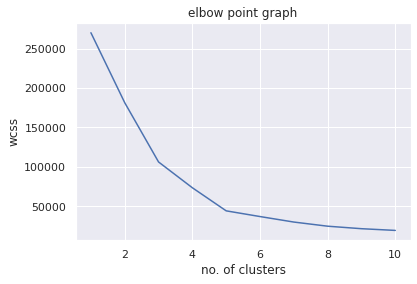

In [38]:
#plot an elbow graph 
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point graph')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show

find the elbow points and choose the one with minimum wcss since optimal clustering have minimal wcss value

In [39]:
#here optimum number of clusters is 5 


Training k-means clustering model

In [40]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)


Return a label for each data point based on their cluster

In [42]:
y=kmeans.fit_predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualising all the clusters


<function matplotlib.pyplot.show>

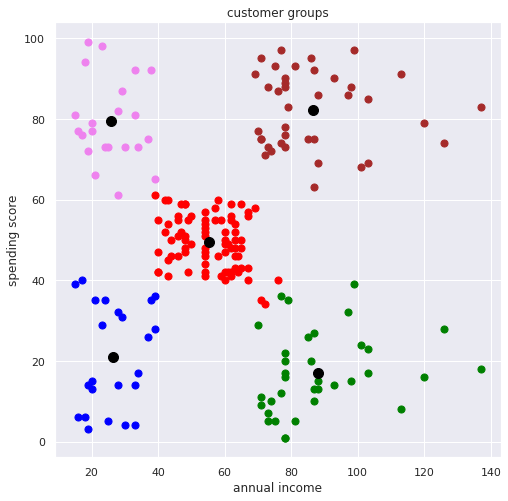

In [46]:
#plotting all the clusters 
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='red',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='green',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='brown',label='cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')

plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show